Implements the hermite inteprolation procedure for one dimensional functions

In [1]:
from __future__ import division
import sys
sys.path.append("/home/marschall/WIAS/Projects/Bayes/tt_als")
from alea.stochastics.random_variable import NormalRV
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy
%reload_ext autoreload
%autoreload 2
%matplotlib inline

ImportError: No module named alea.stochastics.random_variable

Define some functions  

$$f_0 \colon \mathbb{R}\to\mathbb{R}, \; x\mapsto 3x^2+2x+1$$
$$f_1 \colon \mathbb{R}\to\mathbb{R}, \; x\mapsto 2x^4+4x^3+3x^2+2x+1$$
$$f_2 \colon \mathbb{R}\to\mathbb{R}, \; x\mapsto 2x^4+4x^3+3x^2+2x+1 + \sin(5\pi x)$$

In [3]:
f0 = lambda x: np.polyval([3,2,1], x)
f1 = lambda x: np.polyval([2,4,3,2,1], x)
f2 = lambda x: np.polyval([2,4,3,2,1], x) + np.sin(5*np.pi*np.array(x))
f_small = lambda x: np.array(x)*-3

In [4]:
mu = 0
sigma = 1
n_coef = 10
rv = NormalRV(mu, sigma)
x_dom = np.arange(-2, 2, 0.2)
func = lambda x: f1(x)*f0(x)

We test different implementations of the Hermite polynomials. 
The ALEA polynomials are given with respect to the weigth 
   $$ w(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$
where as the scipy Hermite polynomials are defined accordinf to the weight function 
    $$ w(x) = e^{\left(\frac{x-\mu}{\sigma}\right)^2}$$
and moreover there are normalized Hermite polynomials defined in scipy.hermitenorm w.r. to the weight 
    $$ w(x) = e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

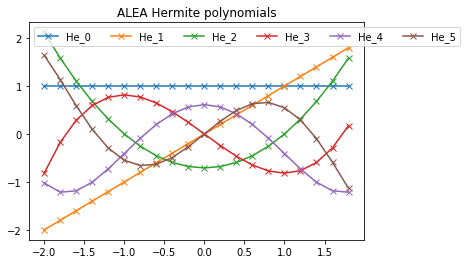

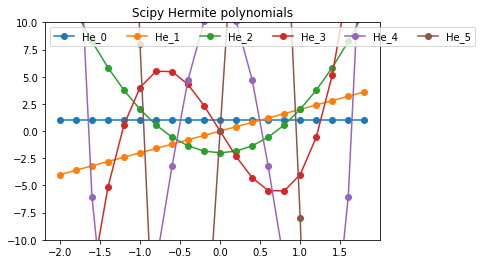

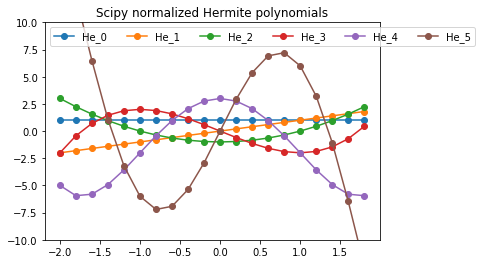

In [34]:
n_polys = 6
for lia in range(n_polys):
    plt.plot(x_dom, [rv.orth_polys.eval(lia, x, False) for x in x_dom], '-x', label='He_{}'.format(lia))
plt.legend(ncol=6, loc=2)
plt.title("ALEA Hermite polynomials")
plt.show()


from scipy.special import hermite as hermit
for lia in range(n_polys):
    plt.plot(x_dom, [hermit(lia)(x) for x in x_dom], '-o', label='He_{}'.format(lia))
plt.legend(ncol=6, loc=2)
plt.ylim(-10, 10)
plt.title("Scipy Hermite polynomials")
plt.show()

from scipy.special import hermitenorm as hermit
for lia in range(n_polys):
    plt.plot(x_dom, [hermit(lia)(x) for x in x_dom], '-o', label='He_{}'.format(lia))
plt.legend(ncol=6, loc=2)
plt.ylim(-10, 10)
plt.title("Scipy normalized Hermite polynomials")
plt.show()

Test if we can scale the scipy Hermite polynomials such that they are equivalent to the ALEA polynomials.
Yes, we can =)
Simply by taking the normalized scipy polynomials and rescaling it with the norm of the ALEA polynomials, i.e. 
$$\mathrm{He}_\nu^{\tiny ALEA}(x) = \frac{1}{\sqrt{\nu !}}\mathrm{He}_\nu^{\tiny hermitenorm}$$

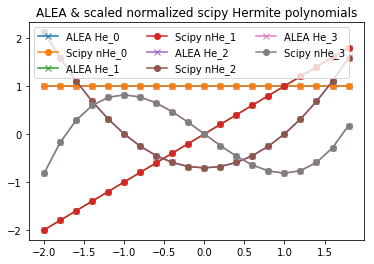

In [107]:
n_polys = 4
# alea_den = lambda x: rv.pdf(x)
# scipy_den = lambda x: np.exp(-0.5*((x-mu)**2/sigma**2))

# scipy_den = lambda x: np.sqrt(2*np.pi*sigma)**(-1)*np.exp(-0.5*((x-mu)**2/sigma**2))
#scipy_den_inv = lambda x: np.sqrt(-2*np.log(x))

# plt.plot(x_dom, alea_den(x_dom), label="ALEA weight")
# plt.plot(x_dom, scipy_den(x_dom), label="scipy weight")
# plt.legend(ncol=2, loc=2)
# plt.show()

from scipy.special import hermitenorm as hermit
for lia in range(0,n_polys):
    plt.plot(x_dom, [rv.orth_polys.eval(lia, x, False) for x in x_dom], '-x', label='ALEA He_{}'.format(lia))
    plt.plot(x_dom, [np.sqrt(np.math.factorial(lia))**(-1)*hermit(lia)(x) for x in x_dom], '-o', label='Scipy nHe_{}'.format(lia))
    # plt.plot(x_dom, [x**2-1 for x in x_dom])
    # plt.plot(x_dom, [0.707106*x**2-0.707106 for x in x_dom])
  
plt.legend(ncol=3, loc=2)
plt.title("ALEA & scaled normalized scipy Hermite polynomials")
plt.show()


In [6]:
def hermite_coeff_own(f, rv, nu, deg=5):
    from numpy.polynomial.hermite_e import hermegauss as gp
    fun = lambda xi: f(xi)*rv.orth_polys.eval(nu, xi, False)
    nodes, weights = gp(deg)
    retval = np.sum([w*fun(x)/np.sqrt((2*np.pi)) for lia, (w,x) in enumerate(zip(weights, nodes))])
    return retval

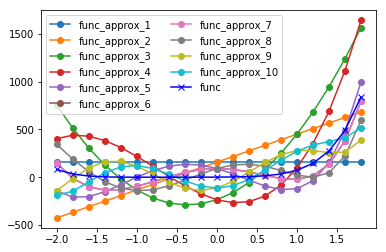

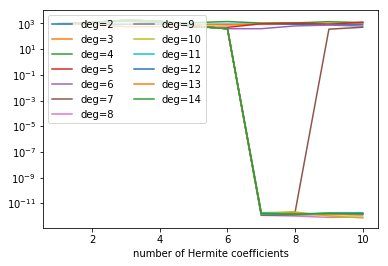

In [7]:
degrees = [2,3,4,5,6,7,8,9,10,11,12,13,14]
from copy import copy
def hermite_coeff(f, rv, nu):
    fun = lambda xi: f(xi)*rv.orth_polys.eval(nu, xi, False)*rv.pdf(xi)
    return quad(fun , -np.inf, np.inf)[0]

def hermite_coeff_2(f, rv, nu):
    from numpy.polynomial.hermite import hermgauss as gp
    from scipy.integrate import simps
    fun = lambda xi: f(xi)*rv.orth_polys.eval(nu, xi, False)*rv.pdf(xi)
    return simps([fun(x) for x in gp(15)[0]], gp(15)[0])



f_approx_list = []
for lic, deg in enumerate(degrees):
    f_approx = []
    for lia in range(n_coef):
        f_approx.append(lambda x: np.sum([hermite_coeff_own(func, rv, nu, deg=deg)*rv.orth_polys.eval(nu, x, False) for nu in range(lia+1)]))
        if lic == 4:
            plt.plot(x_dom, [f_approx[-1](x) for x in x_dom], '-o', label="func_approx_{}".format(lia+1))
    f_approx_list.append(copy(f_approx))
plt.plot(x_dom, [func(x) for x in x_dom], '-xb', label="func")
plt.legend(ncol=2, loc=2)
plt.show()
err_list = []
for lic, deg in enumerate(degrees):
    # print("lic={}".format(lic))
    err = []
    for lia in range(n_coef):
        # print("  lia={}".format(lia))
        err.append(np.linalg.norm([func(x) - f_approx_list[lic][lia](x) for x in x_dom]))
    # print err
    plt.semilogy(range(1,n_coef+1), err, label="deg={}".format(deg))
plt.legend(ncol=2, loc=2)
plt.xlabel("number of Hermite coefficients")
plt.show()


In [80]:
fun = lambda x: x**3
herm = lambda x: x**3 -3*x

from numpy.polynomial.hermite_e import hermegauss as gp
from scipy.integrate import quad 

val_ref, err = quad(lambda x: fun(x)*herm(x)*np.exp(-x**2 * 0.5), -np.inf, np.inf)
nodes, weights = gp(6)
val = np.sum([w*fun(x)*herm(x) for (w, x) in zip(weights, nodes)])
print val_ref
print val
print err

15.0397696478
15.0397696478
1.23669151931e-08
